# Project 3

### Excercise 1 - histogram

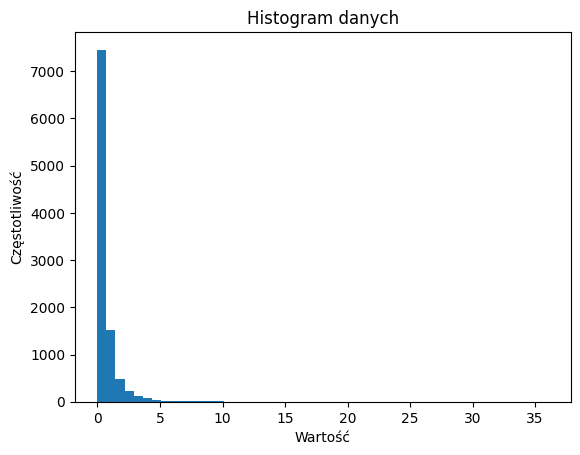

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.pareto(a=2.5, size=10000)  # rozkład Lomaxa (Pareto Typu II)
data_pareto_1 = data + 1 # (Pareto Typu I)
plt.hist(data, bins=50)
plt.xlabel("Wartość")
plt.ylabel("Częstotliwość")
plt.title("Histogram danych")
plt.show()

Exercise 2 - log scale

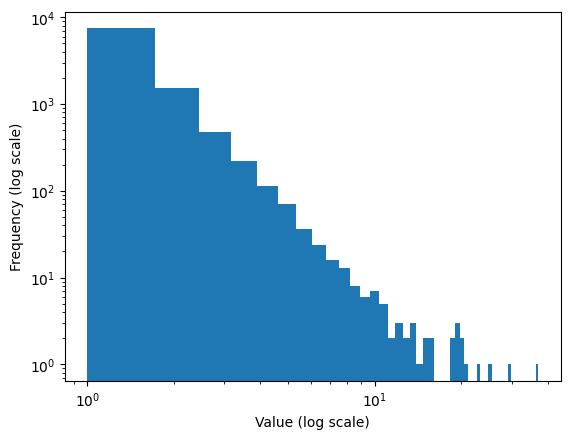

In [3]:
plt.hist(data_pareto_1, bins=50)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Value (log scale)")
plt.ylabel("Frequency (log scale)")
plt.show()


### Excercise 3 - log binning

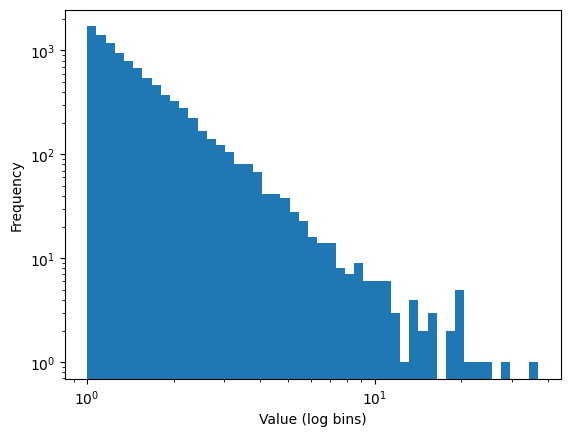

In [6]:
bins = np.logspace(np.log10(min(data_pareto_1)), np.log10(max(data_pareto_1)), 50)
plt.hist(data_pareto_1, bins=bins)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Value (log bins)")
plt.ylabel("Frequency")
plt.show()

### Excercise 4 - survival function

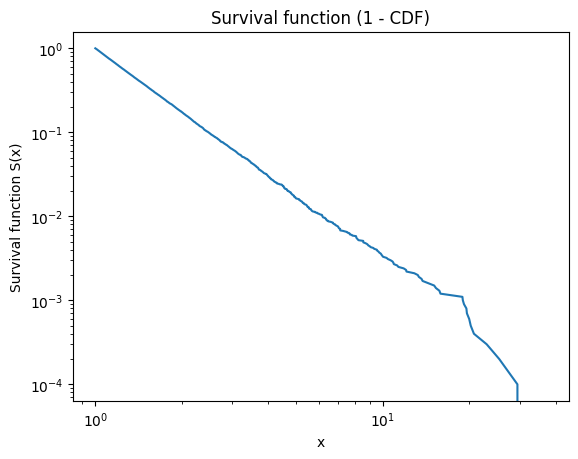

In [7]:
sorted_data = np.sort(data_pareto_1)
survival = 1.0 - np.arange(1, len(sorted_data) + 1) / len(sorted_data)

plt.loglog(sorted_data, survival)
plt.xlabel("x")
plt.ylabel("Survival function S(x)")
plt.title("Survival function (1 - CDF)")
plt.show()


### Analyse:

Linear histogram: easy to interpret, but unclear for data with a long tail.

Double-log plot: clearly shows power relationships.

Log-binning: better for a wide range of values — smooths data and reduces noise.

Survival function: most robust to noise and fluctuations, especially for rare data in the tail of the distribution.

### EXERCISE 6: log–log plot

Zadanie 6 — Alpha z regresji liniowej: 2.489


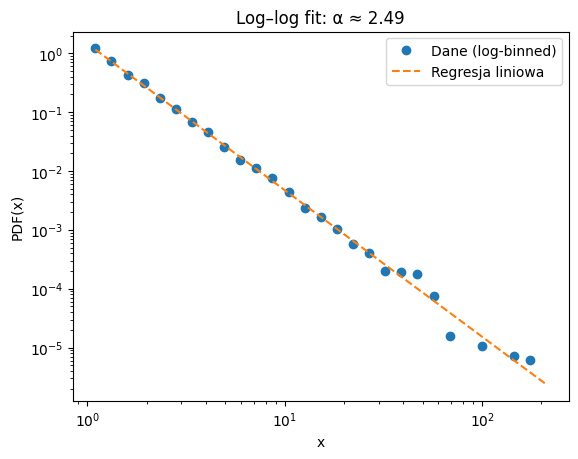

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# --- Dane przykładowe: rozkład Pareto ---
np.random.seed(42)
alpha_true = 2.5     # prawdziwa wartość alpha
xmin = 1.0
n = 5000

# Generujemy dane z rozkładu potęgowego (Pareto)
u = np.random.rand(n)
data = xmin * (1 - u) ** (-1 / (alpha_true - 1))

# Histogram z log-binningiem
bins = np.logspace(np.log10(xmin), np.log10(data.max()), 30)
counts, edges = np.histogram(data, bins=bins)
bin_centers = np.sqrt(edges[:-1] * edges[1:])
pdf = counts / (np.diff(edges) * len(data))   # normalizacja

# Regresja liniowa na log-log
mask = pdf > 0
slope, intercept, *_ = linregress(np.log10(bin_centers[mask]), np.log10(pdf[mask]))
alpha_reg = -slope  # nachylenie ~ -alpha

print(f"Zadanie 6 — Alpha z regresji liniowej: {alpha_reg:.3f}")

# Wykres
plt.loglog(bin_centers, pdf, 'o', label='Dane (log-binned)')
plt.loglog(bin_centers, 10**(intercept) * bin_centers**slope, '--', label='Regresja liniowa')
plt.xlabel("x")
plt.ylabel("PDF(x)")
plt.legend()
plt.title(f"Log–log fit: α ≈ {alpha_reg:.2f}")
plt.show()

### EXERCISE 7: MLE estimator for known xmin

In [9]:

# --------------------------------------------------------------------
# EXERCISE 7: Estymator MLE dla znanego xmin
# --------------------------------------------------------------------
def mle_alpha(x, xmin):
    x = x[x >= xmin]
    return len(x) / np.sum(np.log(x / xmin))

alpha_mle = mle_alpha(data_pareto_1, xmin=1.00)
print(f"Zadanie 7 — Alpha z MLE: {alpha_mle:.3f}")


Zadanie 7 — Alpha z MLE: 2.529


# MLE Formula

Maximum Likelihood Estimator (MLE) for Pareto $\alpha$ (Known $x_{min}$)

The Maximum Likelihood Estimator (MLE) for the exponent $\alpha$ of the Pareto Type I distribution (where $x \ge x_{min}$) is derived by maximizing the Log-Likelihood function.1. The Pareto I PDF

The Probability Density Function (PDF) for a Pareto Type I distribution is:$$p(x; \alpha, x_{min}) = \frac{\alpha x_{min}^\alpha}{x^{\alpha+1}} \quad \text{for } x \ge x_{min}$$2. Derivation StepsGiven an independent sample set $X = \{x_1, x_2, \ldots, x_n\}$, the Log-Likelihood function $\ln L(\alpha)$ is:$$\ln L(\alpha) = n \ln \alpha + n \alpha \ln x_{min} - (\alpha+1) \sum_{i=1}^n \ln x_i$$To find the MLE $\hat{\alpha}$, we take the derivative with respect to $\alpha$ and set it to zero:$$\frac{d}{d\alpha} \ln L(\alpha) = \frac{n}{\alpha} + n \ln x_{min} - \sum_{i=1}^n \ln x_i = 0$$3. The Resulting EstimatorSolving for $\alpha$ yields the MLE estimator $\hat{\alpha}$:$$\hat{\alpha} = \frac{n}{\sum_{i=1}^n (\ln x_i - \ln x_{min})} = \frac{n}{\sum_{i=1}^n \ln \left( \frac{x_i}{x_{min}} \right)}$$

In [8]:
# AI was used for formulation help

# EXERCISE 8: What if we don't know xmin?

When xmin is unknown:
- If we choose xmin too small, the result will be underestimated (because data outside the tail spoils the fit).
- If it is too large, the estimation will be less accurate (less data).
In practice, xmin is selected by minimizing the KS distance between the data and the model.

## Exercise P4.2 — Proof for uncorrelated network

For an **uncorrelated network**, the conditional probability that a randomly chosen edge from a vertex of degree $k$ points to a vertex of degree $k'$ is independent of $k$ and given by:

$$
P(k'|k) = \frac{k' P(k')}{\langle k \rangle}.
$$

This means that the probability is proportional to the number of edge ends at vertices of degree $k'$.

The average degree of the nearest neighbors of vertices with degree $k$ is defined as:

$$
\langle k_{nn}(k) \rangle = \sum_{k'} k' P(k'|k).
$$

Substituting the uncorrelated probability:

$$
\begin{aligned}
\langle k_{nn}(k) \rangle &= \sum_{k'} k' \frac{k' P(k')}{\langle k \rangle} \\
&= \frac{1}{\langle k \rangle} \sum_{k'} k'^2 P(k') \\
&= \frac{\langle k^2 \rangle}{\langle k \rangle}.
\end{aligned}
$$

Hence, for an uncorrelated network, $\langle k_{nn}(k) \rangle$ is a **constant** that does not depend on $k$:

$$
\boxed{ \langle k_{nn}(k) \rangle = \frac{\langle k^2 \rangle}{\langle k \rangle}. }
$$


## Exercise P4.3 — Dependence of nearest-neighbor degree on vertex degree

We can numerically compute $\langle k_{nn}(k) \rangle$ for a given network using NetworkX:


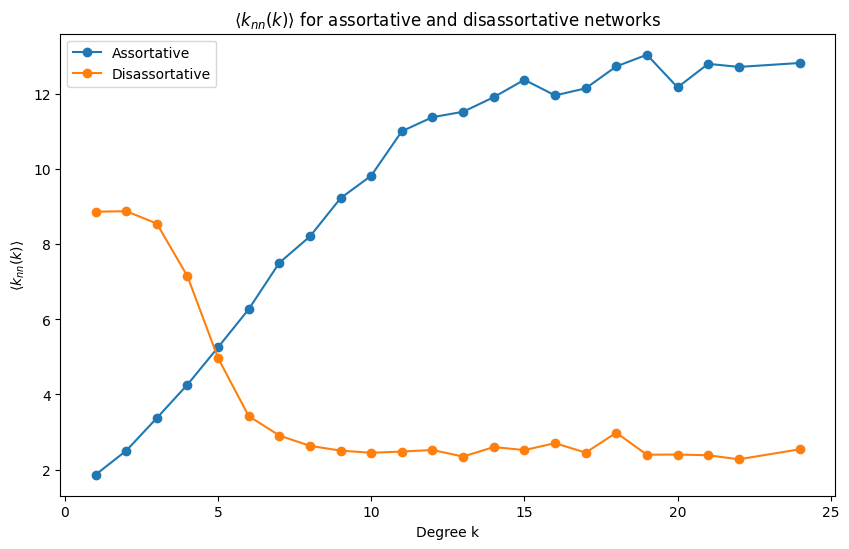

In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random

def knn_by_degree(G):
    knn_node = nx.average_neighbor_degree(G)
    deg = dict(G.degree())
    by_k = defaultdict(list)
    for node, k in deg.items():
        by_k[k].append(knn_node[node])
    ks = sorted(by_k.keys())
    knn_k = {k: np.mean(by_k[k]) for k in ks}
    return knn_k

def plot_knn(knn_k, label=None):
    ks = np.array(sorted(knn_k.keys()))
    vals = np.array([knn_k[k] for k in ks])
    plt.plot(ks, vals, 'o-', label=label)
    if label: plt.legend()
    plt.xlabel("Degree k")
    plt.ylabel(r"$\langle k_{nn}(k) \rangle$")

# ----------------- REWIRING FUNCTIONS -----------------

def make_assortative(G, steps=20000):
    H = G.copy()
    edges = list(H.edges())
    degrees = dict(H.degree())
    for _ in range(steps):
        u, v = random.choice(edges)
        x, y = random.choice(edges)
        if len({u, v, x, y}) < 4:
            continue

        # current
        c = abs(degrees[u] - degrees[v]) + abs(degrees[x] - degrees[y])
        # proposed
        n = abs(degrees[u] - degrees[x]) + abs(degrees[v] - degrees[y])

        if n < c:
            if not H.has_edge(u, x) and not H.has_edge(v, y):
                H.remove_edge(u, v)
                H.remove_edge(x, y)
                H.add_edge(u, x)
                H.add_edge(v, y)
                edges = list(H.edges())
    return H

def make_disassortative(G, steps=20000):
    H = G.copy()
    edges = list(H.edges())
    degrees = dict(H.degree())
    for _ in range(steps):
        u, v = random.choice(edges)
        x, y = random.choice(edges)
        if len({u, v, x, y}) < 4:
            continue

        c = abs(degrees[u] - degrees[v]) + abs(degrees[x] - degrees[y])
        n = abs(degrees[u] - degrees[x]) + abs(degrees[v] - degrees[y])

        if n > c:
            if not H.has_edge(u, x) and not H.has_edge(v, y):
                H.remove_edge(u, v)
                H.remove_edge(x, y)
                H.add_edge(u, x)
                H.add_edge(v, y)
                edges = list(H.edges())
    return H

# ----------------- MAIN -----------------

n = 3000

# START: random exponential degree distribution
degrees = np.random.exponential(scale=3, size=n).astype(int)
degrees[degrees < 1] = 1

G0 = nx.configuration_model(degrees)
G0 = nx.Graph(G0)
G0.remove_edges_from(nx.selfloop_edges(G0))

# rewired networks
G_assort = make_assortative(G0, steps=20000)
G_disassort = make_disassortative(G0, steps=20000)

# compute k_nn
knn_assort = knn_by_degree(G_assort)
knn_disassort = knn_by_degree(G_disassort)

# plot
plt.figure(figsize=(10,6))
plot_knn(knn_assort, label="Assortative")
plot_knn(knn_disassort, label="Disassortative")
plt.title(r"$\langle k_{nn}(k) \rangle$ for assortative and disassortative networks")
plt.show()

Interpretation:

- Assortative network:
The curve 
⟨
𝑘
𝑛
𝑛
(
𝑘
)
⟩
 increases with node degree 
𝑘

This indicates that high-degree nodes tend to connect to other high-degree nodes, and low-degree nodes connect to low-degree ones.

- Disassortative network:
The curve 
⟨
𝑘
𝑛
𝑛
(
𝑘
)
⟩
decreases with node degree 
𝑘

This means that high-degree nodes tend to connect to low-degree nodes, producing negative degree–degree correlations.

w asortatywnym grafie:

⟨
𝑘
𝑛
𝑛
(
𝑘
)
⟩
 rośnie ze stopniem → wysoki stopień łączy się z wysokim

w dysortatywnym grafie:

⟨
𝑘
𝑛
𝑛
(
𝑘
)
⟩
 maleje ze stopniem → wysoki stopień łączy się z niskim

# Exercise 4.4 - checking how randomizing (random edge switching) affects the average nearest-neighbor degree by node degree

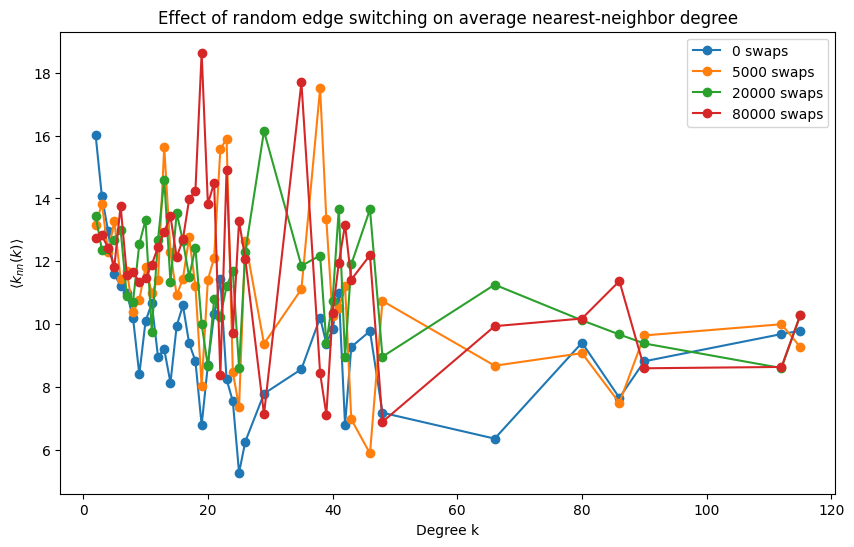

In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import copy

def knn_by_degree(G):
    knn_node = nx.average_neighbor_degree(G)
    deg = dict(G.degree())
    by_k = defaultdict(list)
    for node, k in deg.items():
        by_k[k].append(knn_node[node])
    ks = sorted(by_k.keys())
    knn_k = {k: np.mean(by_k[k]) for k in ks}
    return knn_k

def plot_knn(knn_k, label=None):
    ks = np.array(sorted(knn_k.keys()))
    vals = np.array([knn_k[k] for k in ks])
    plt.plot(ks, vals, 'o-', label=label)
    if label: plt.legend()
    plt.xlabel('Degree k')
    plt.ylabel(r'$\langle k_{nn}(k) \rangle$')

# -----------------------------------------
# RANDOMIZATION EXPERIMENT
# -----------------------------------------

# Starting graph
n = 3000
G0 = nx.barabasi_albert_graph(n, m=2)

# Amounts of randomization
swap_steps = [0, 5000, 20000, 80000]

plt.figure(figsize=(10,6))

for steps in swap_steps:
    G = copy.deepcopy(G0)
    
    # apply random double-edge swaps
    if steps > 0:
        nx.double_edge_swap(G, nswap=steps, max_tries=steps*5)
    
    knn = knn_by_degree(G)
    plot_knn(knn, label=f"{steps} swaps")

plt.title("Effect of random edge switching on average nearest-neighbor degree")
plt.show()

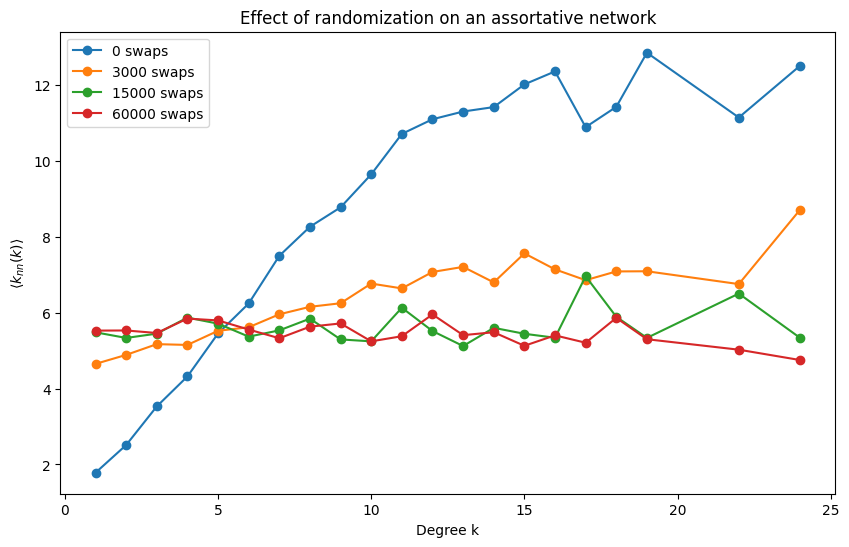

In [14]:
# -------------------------------------------------
# RANDOMIZATION EXPERIMENT FOR ASSORTATIVE NETWORK
# -------------------------------------------------

n = 3000

# Realistic degree distribution
degrees = np.random.exponential(scale=3, size=n).astype(int)
degrees[degrees < 1] = 1

G0 = nx.configuration_model(degrees)
G0 = nx.Graph(G0)
G0.remove_edges_from(nx.selfloop_edges(G0))

# Build strongly assortative network
G_assort = make_assortative(G0, steps=20000)

# Amount of random rewiring
swap_steps = [0, 3000, 15000, 60000]

plt.figure(figsize=(10,6))

for steps in swap_steps:
    G = copy.deepcopy(G_assort)
    
    if steps > 0:
        nx.double_edge_swap(G, nswap=steps, max_tries=steps*5)
    
    knn = knn_by_degree(G)
    plot_knn(knn, label=f"{steps} swaps")

plt.xlabel("Degree k")
plt.ylabel(r"$\langle k_{nn}(k) \rangle$")
plt.title("Effect of randomization on an assortative network")
plt.show()
